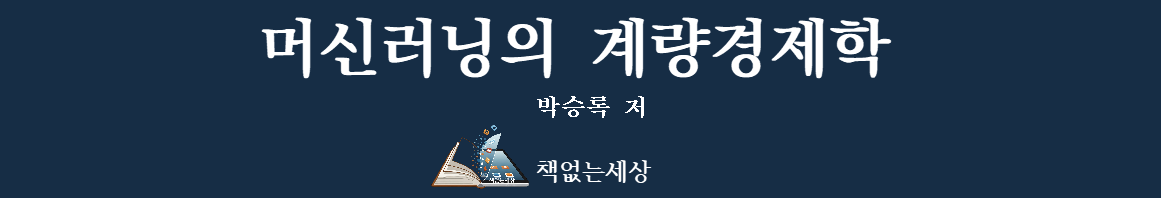

# Part 8: 머신러닝의 계량경제

## Chapter 3: 머신러닝의 자동화: Pycaret 활용

### 5. PyCaret을 이용한 군집분석( clustering)

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("X:/Econometrics_with_ML")
os.getcwd()

'X:\\Econometrics_with_ML'

In [2]:
# 라이브러리 불러오기
exec(open('Functions/Machine Learning_Econometrics_Lib.py').read())

In [3]:
from pandas import read_csv
name = ('Age Income SpendingScore Savings').split()
data = read_csv('./Data/jewellery.csv', usecols=name)
display(data)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
...,...,...,...,...
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445


#### 1) 셋업(Setup)

In [6]:
# import pycaret clustering and init setup
from pycaret.clustering import *
model = setup(data, normalize = True)

,Description,Value
0,Session id,2212
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


#### 2) 모형 생성과 평가(Create and Evaluate Model)

In [7]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [8]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


In [9]:
# train meanshift model
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7325,1122.4249,0.3947,0,0,0


#### 3) 모형분석

In [10]:
#모형평가
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
# pca cluster plot 생성
plot_model(kmeans, plot = 'cluster')

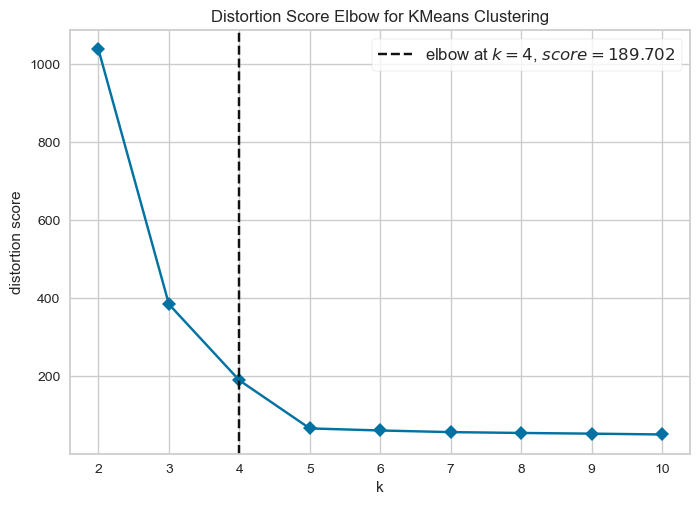

In [11]:
# 앨보우 플롯 생성
plot_model(kmeans, plot = 'elbow')

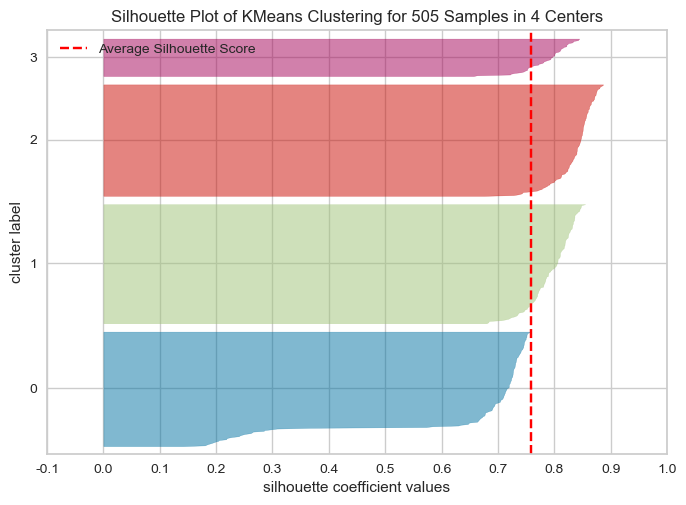

In [12]:
# 실루엣 플롯 생성
plot_model(kmeans, plot = 'silhouette')

#### 4) 군집할당

In [13]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 1
1,59,81799,0.791082,5417.661621,Cluster 1
2,62,74751,0.702657,9258.993164,Cluster 1
3,59,74373,0.765680,7346.334473,Cluster 1
4,87,17760,0.348778,16869.507812,Cluster 2
...,...,...,...,...,...
500,28,101206,0.387441,14936.775391,Cluster 0
501,93,19934,0.203140,17969.693359,Cluster 2
502,90,35297,0.355149,16091.402344,Cluster 2
503,91,20681,0.354679,18401.087891,Cluster 2


You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [16]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.clustering.functional:

plot_model(model, plot: str = 'cluster', feature: Optional[str] = None, label: bool = False, scale: float = 1, save: bool = False, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> jewellery = get_data('jewellery')
    >>> from pycaret.clustering import *
    >>> exp_name = setup(data = jewellery)
    >>> kmeans = create_model('kmeans')
    >>> plot_model(kmeans, plot = 'cluster')
    
    
    model: scikit-learn compatible object
        Trained Model Object
    
    
    plot: str, default = 'cluster'
        List of available plots (ID - Name):
    
        * 'cluster' - Cluster PCA Plot (2d)
        * 'tsne' - Cluster t-SNE (3d)
        * 'elbow' - Elbow Plot
        * 'silhouette' - Silhouette Plot
        * 'distance' - Distance Plot
        * 'distribution

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [ ]:
# check docstring to see available plots
help(plot_model)

#### 5) 예측(Prediction)

In [20]:
# predict on test set
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,Age,Income,SpendingScore,Savings,Cluster
0,-0.042287,0.062733,1.103593,-1.072467,Cluster 1
1,-0.000821,0.174811,1.102641,-1.303473,Cluster 1
2,0.123577,-0.021200,0.761727,-0.526556,Cluster 1
3,-0.000821,-0.031712,1.004705,-0.913395,Cluster 1
4,1.160228,-1.606165,-0.602619,1.012686,Cluster 2
...,...,...,...,...,...
500,-1.286268,0.714535,-0.453557,0.621787,Cluster 0
501,1.409024,-1.545704,-1.164109,1.235201,Cluster 2
502,1.284626,-1.118447,-0.578054,0.855313,Cluster 2
503,1.326092,-1.524929,-0.579866,1.322452,Cluster 2


#### 5) 모형저장과 로딩(loading)

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [19]:
# save pipeline
save_model(kmeans, './Output/Model_kmeans')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Income', 'SpendingScore',
                                              'Savings'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', KMeans(n_clusters=4, random_state=2577))]),
 './Output/Model_kmeans.pkl')

In [21]:
# load pipeline
kmeans_pipeline = load_model('./Output/Model_kmeans')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\PARKSE~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Age', 'Income', 'SpendingScore',
                                             'Savings'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', KMeans(n_clusters=4, random_state=2577))])